<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# Nu-Support Vector Regression with MinMaxScaler & PolynomialFeatures

This Code template is for regression analysis using a Nu-Support Vector Regressor(NuSVR) based on the Support Vector Machine algorithm with PolynomialFeatures as Feature Transformation Technique and MinMaxScaler for Feature Scaling in a pipeline.

### Required Packages

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as se 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.svm import NuSVR 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
file_path= ""

List of features which are  required for model training .

In [3]:
features =[]

Target feature for prediction.

In [4]:
target=''

### Data Fetching
Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [6]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [7]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [8]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
Y=NullClearner(Y)
X=EncodeX(X)
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

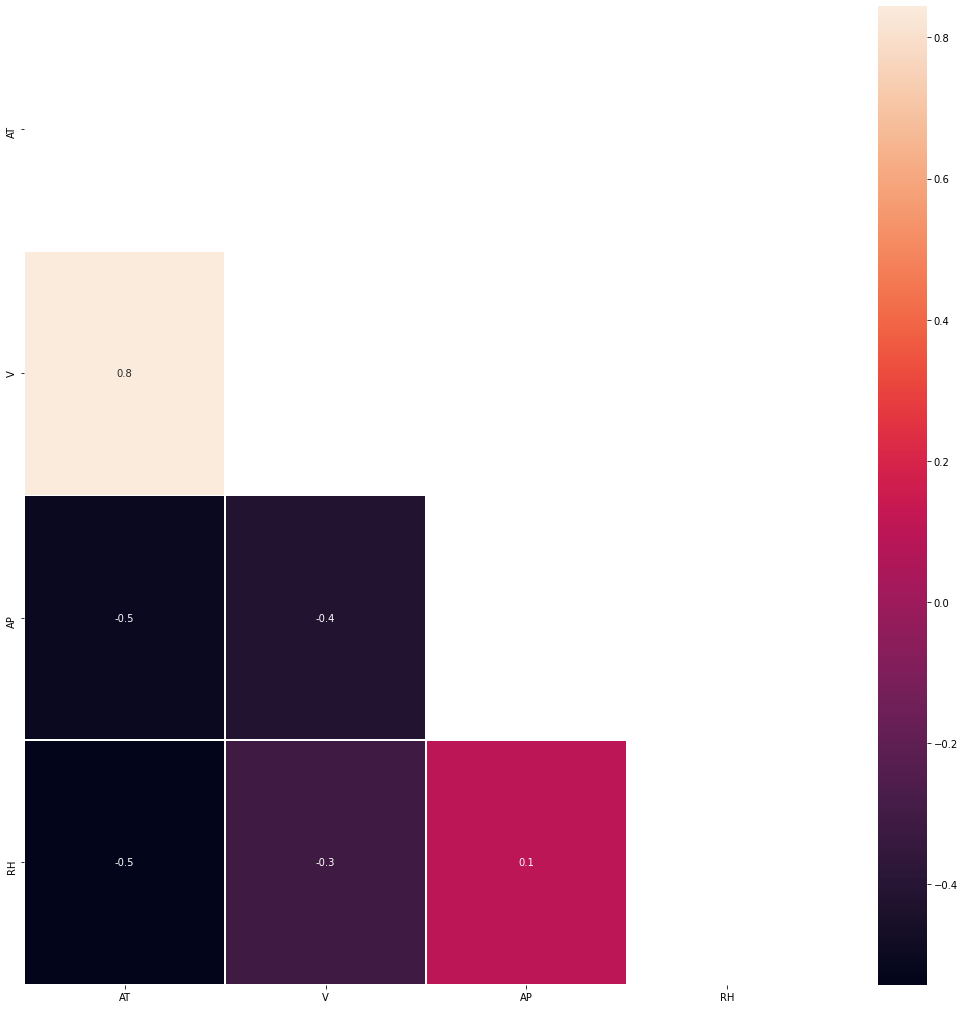

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Model
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

A Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. In other terms, for a given known/labelled data points, the SVM outputs an appropriate hyperplane that classifies the inputted new cases based on the hyperplane. In 2-Dimensional space, this hyperplane is a line separating a plane into two segments where each class or group occupied on either side.

Here we will use NuSVR, the NuSVR implementation is based on libsvm. Similar to NuSVC, for regression, uses a parameter nu to control the number of support vectors. However, unlike NuSVC, where nu replaces C, here nu replaces the parameter epsilon of epsilon-SVR. 
#### Model Tuning Parameters

    1. nu : float, default=0.5
> An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. By default 0.5 will be taken.

    2. C : float, default=1.0
> Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

    3. kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
> Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

    4. gamma : {‘scale’, ‘auto’} or float, default=’scale’
> Gamma is a hyperparameter that we have to set before the training model. Gamma decides how much curvature we want in a decision boundary.

    5. degree : int, default=3
> Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.Using degree 1 is similar to using a linear kernel. Also, increasing degree parameter leads to higher training times.

### Feature Rescaling
**MinMaxScaler**

* We use MinMaxScaler to scale the data. The MinMaxScaler scaler scale the data beetween 0 to 1
* formula for scaling (actual-min / max-min)
* We will fit an object of MinMaxScaler to training data then transform the same data by fit_transform(X_train) method


#### Feature Transformation

Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

In [12]:
model=make_pipeline(MinMaxScaler(),PolynomialFeatures(),NuSVR())
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('nusvr',
                 NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                       gamma='scale', kernel='rbf', max_iter=-1, nu=0.5,
                       shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

> **score**: The **score** function returns the coefficient of determination <code>R<sup>2</sup></code> of the prediction.

In [13]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 93.55 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [14]:
y_pred=model.predict(X_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 93.55 %
Mean Absolute Error 3.33
Mean Squared Error 18.67


#### Prediction Plot

First, we make use of a scatter plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

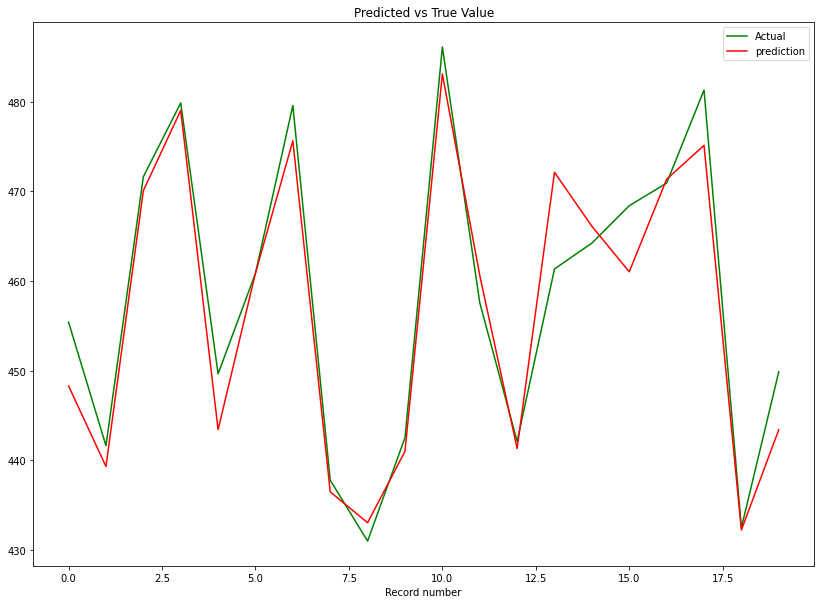

In [15]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual", "prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Virat Chowdary , Github: [Profile](https://github.com/viratchowdary21)
